# PROJECT 3 DEEP LEARNING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn import linear_model
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,explained_variance_score
from sklearn.metrics import mean_squared_error as mse
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.model_selection import KFold, StratifiedKFold
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Concatenate
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score





In [2]:
super_df=pd.read_csv("supermarket_sales.csv")
super_df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

## Variable Description

In [3]:
super_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

***


*There are 17 colums and data types are object, float64 and int64*


***


## Total rows and columns

In [4]:
super_df.shape

(1000, 17)



*Rows: 1000,  colums: 17*
        


## Describe - Data Types

#### For Numeric Data Types

In [5]:
super_df.describe()  

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

#### For Object Data Types

In [6]:
super_df.describe(include=['O'])  

Invoice ID Branch    City Customer type  Gender         Product line  \
count          1000   1000    1000          1000    1000                 1000   
unique         1000      3       3             2       2                    6   
top     633-91-1052      A  Yangon        Member  Female  Fashion accessories   
freq              1    340     340           501     501                  178   

            Date   Time  Payment  
count       1000   1000     1000  
unique        89    506        3  
top     2/7/2019  14:42  Ewallet  
freq          20      7      345

## Missing Value

In [7]:
super_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

<AxesSubplot:>

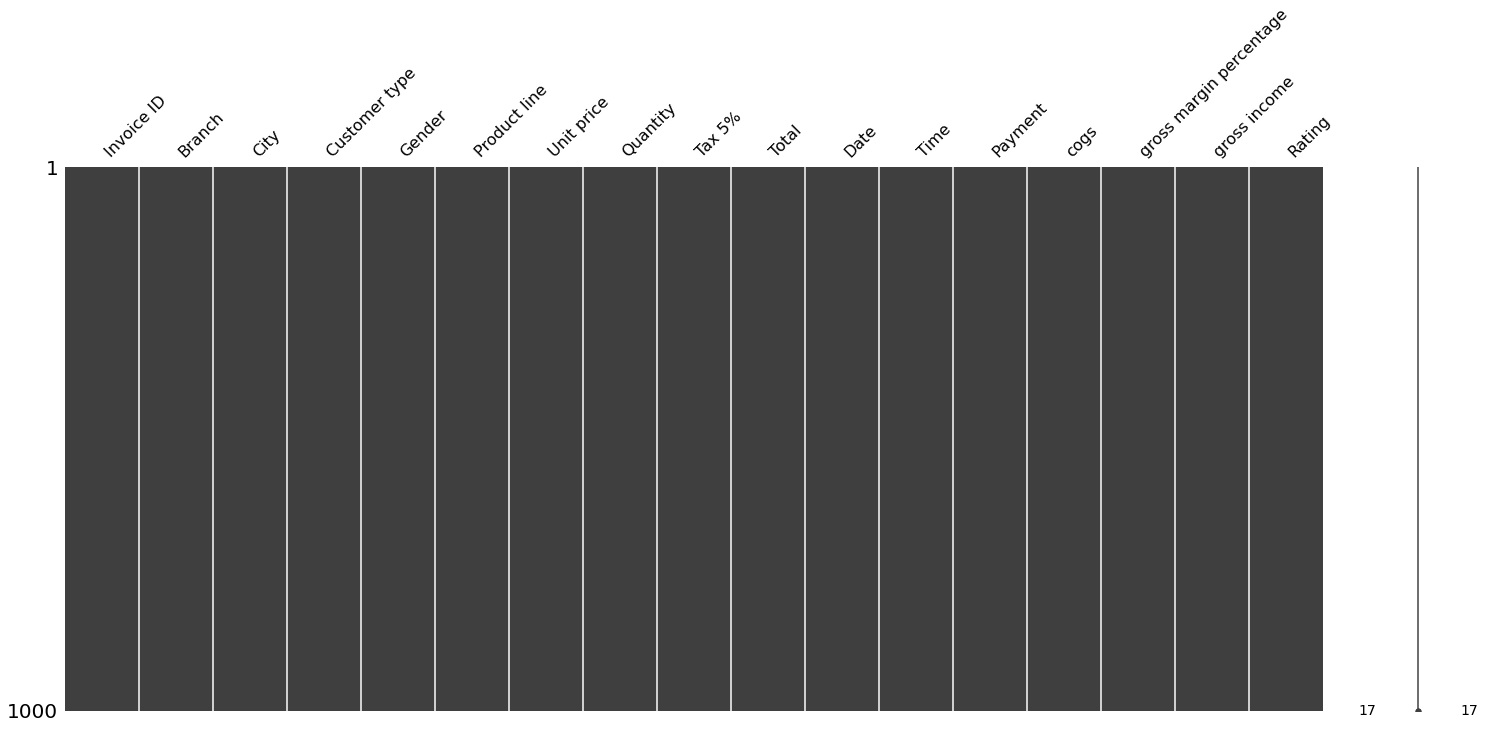

In [8]:
msno.matrix(super_df)

***

*There is no missing value*


***


## Categorical Variable

### 1. Branch

In [9]:
super_df["Branch"].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

Text(0.5, 1.0, 'Branch')

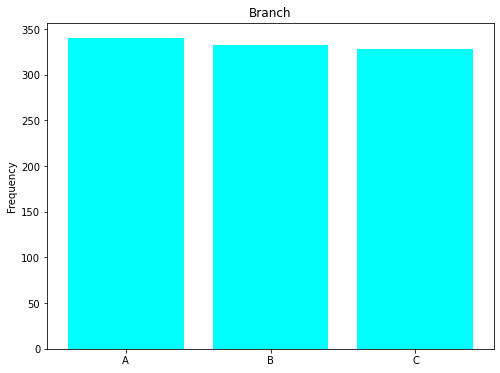

In [10]:
plt.figure(figsize=(8,6))

plt.bar(x = ["A","B","C"], height = super_df["Branch"].value_counts(), color="#00FFFF")
plt.ylabel("Frequency")
plt.title("Branch")

### 2. City

In [11]:
super_df["City"].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

Text(0.5, 1.0, 'City')

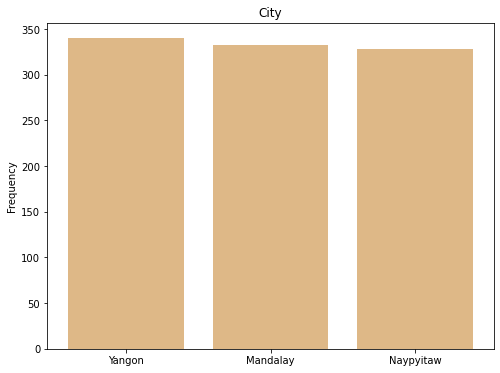

In [12]:
plt.figure(figsize=(8,6))

plt.bar(x = ["Yangon","Mandalay","Naypyitaw"], height = super_df["City"].value_counts(), color="#DEB887")
plt.ylabel("Frequency")
plt.title("City")

### 3. Customer Type

In [13]:
super_df["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

Text(0.5, 1.0, 'Customer type')

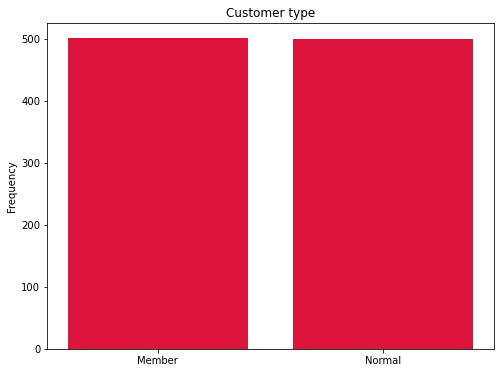

In [14]:
plt.figure(figsize=(8,6))

plt.bar(x = ["Member","Normal"], height = super_df["Customer type"].value_counts(), color="#DC143C")
plt.ylabel("Frequency")
plt.title("Customer type")

### 4. Gender

In [15]:
super_df["Gender"].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender')

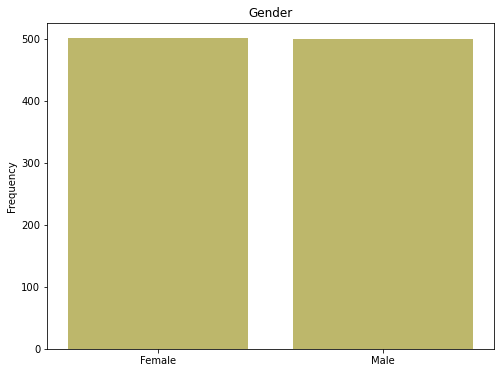

In [16]:
plt.figure(figsize=(8,6))

plt.bar(x = ["Female","Male"], height = super_df["Gender"].value_counts(), color="#BDB76B")
plt.ylabel("Frequency")
plt.title("Gender")

### 5. Product Line

In [17]:
super_df["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

Text(0.5, 1.0, 'Product line')

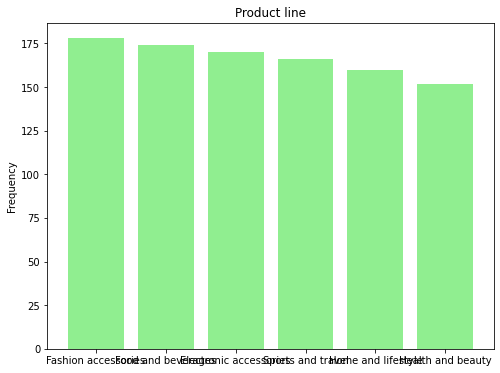

In [18]:
plt.figure(figsize=(8,6))

plt.bar(x = ["Fashion accessories","Food and beverages","Electronic accessories","Sports and travel", "Home and lifestyle","Health and beauty"], height = super_df["Product line"].value_counts(), color="#90EE90")
plt.ylabel("Frequency")
plt.title("Product line")

### 6. Payment

In [19]:
super_df["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

Text(0.5, 1.0, 'Payment')

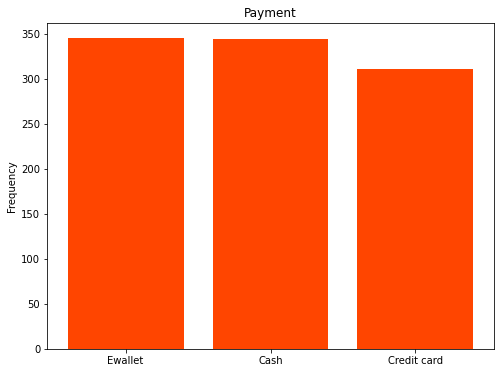

In [20]:
plt.figure(figsize=(8,6))

plt.bar(x = ["Ewallet","Cash","Credit card"], height = super_df["Payment"].value_counts(), color="#FF4500")
plt.ylabel("Frequency")
plt.title("Payment")

**Second Method**

In [21]:
def graph1(variable):               
    #get feature
    var1=super_df[variable]
    
    #count number of categorical variable(value)
    var1_value=var1.value_counts()
    
    
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var1_value.index, var1_value, color="#DEB887")
    plt.xticks=(var1_value.index, var1_value.index.values)
    plt.ylabel("Frequency")
    plt.title("{}".format(variable))
    
    plt.show()
    
    

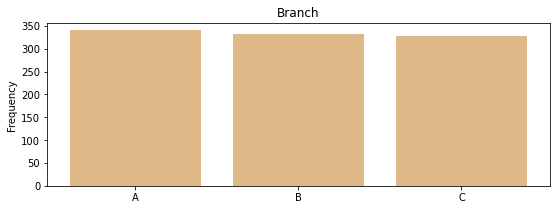

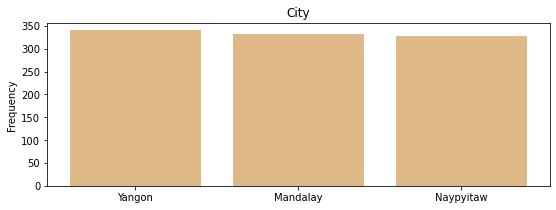

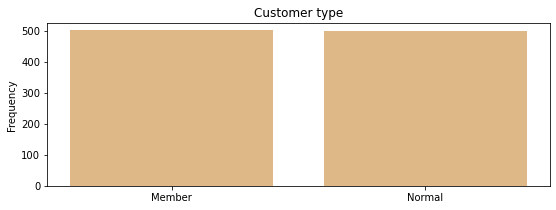

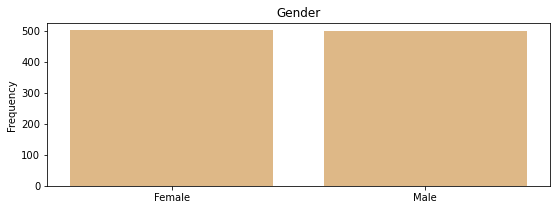

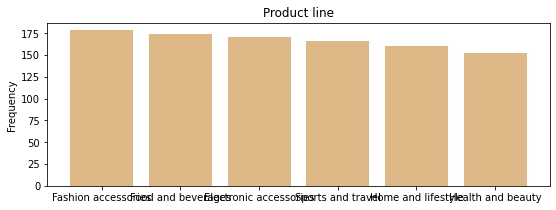

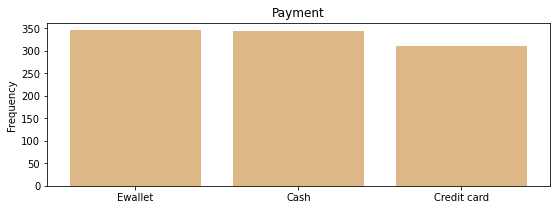

In [22]:
category1=["Branch","City", "Customer type", "Gender", "Product line", "Payment"]
for x in category1:
    graph1(x)

**Third Method**

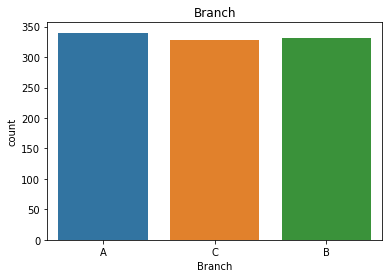

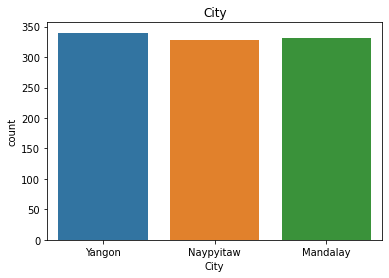

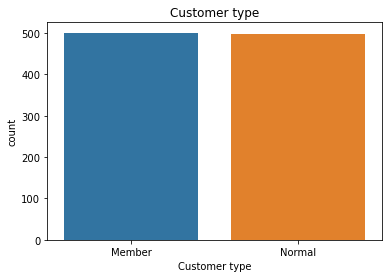

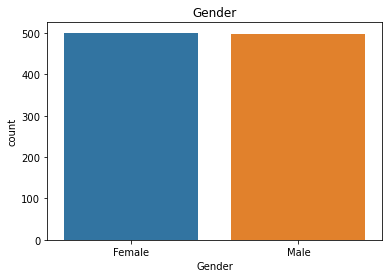

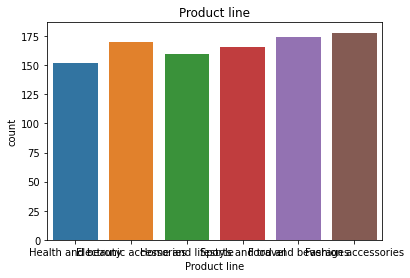

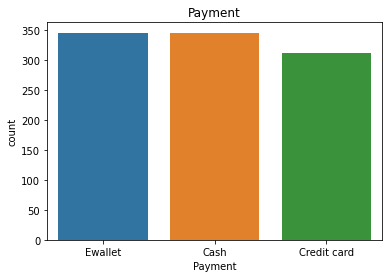

In [23]:
for i in category1:
    plt.title(i)
    sns.countplot(x=super_df[i])
    
    plt.show()
  

## Feature Engineering (One Hot Encoding)

### 1. Branch

In [12]:
super_df2=super_df.copy()

In [25]:
pd.get_dummies(super_df2["Branch"])

A  B  C
0    1  0  0
1    0  0  1
2    1  0  0
3    1  0  0
4    1  0  0
..  .. .. ..
995  0  0  1
996  0  1  0
997  1  0  0
998  1  0  0
999  1  0  0

[1000 rows x 3 columns]

In [26]:
super_df2= pd.concat([super_df2, pd.get_dummies(super_df["Branch"], drop_first=True)], axis=1)
super_df2.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1   
1  10:29         Cash   76.40                 4.761905        3.8200     9.6   
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4   
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4   
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3   

   B  C  
0  0  0  
1  0  1  
2  0  0  
3  0  0  
4  0  0

### 2. City

In [27]:
pd.get_dummies(super_df2["City"])

Mandalay  Naypyitaw  Yangon
0           0          0       1
1           0          1       0
2           0          0       1
3           0          0       1
4           0          0       1
..        ...        ...     ...
995         0          1       0
996         1          0       0
997         0          0       1
998         0          0       1
999         0          0       1

[1000 rows x 3 columns]

In [28]:
super_df2= pd.concat([super_df2, pd.get_dummies(super_df["City"], drop_first=True)], axis=1)
super_df2.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  ...  \
0       Health and beauty       74.69         7  26.1415  548.9715  ...   
1  Electronic accessories       15.28         5   3.8200   80.2200  ...   
2      Home and lifestyle       46.33         7  16.2155  340.5255  ...   
3       Health and beauty       58.22         8  23.2880  489.0480  ...   
4       Sports and travel       86.31         7  30.2085  634.3785  ...   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1   
1  10:29         Cash   76.40                 4.761905        3.8200     9.6   
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4   
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4   
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3   

   B  C  Naypyitaw  Yangon  
0  0  0          0       1  
1  0  1          1       0  
2  0  0          0       1  
3  0  0          0       1  
4  0  0          0       1  

[5 rows x 21 columns]

### 3.  Customer Type

In [29]:
pd.get_dummies(super_df2["Customer type"])

Member  Normal
0         1       0
1         0       1
2         0       1
3         1       0
4         0       1
..      ...     ...
995       0       1
996       0       1
997       1       0
998       0       1
999       1       0

[1000 rows x 2 columns]

In [30]:
super_df2= pd.concat([super_df2, pd.get_dummies(super_df["Customer type"], drop_first=True)], axis=1)
super_df2.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  ...  \
0       Health and beauty       74.69         7  26.1415  548.9715  ...   
1  Electronic accessories       15.28         5   3.8200   80.2200  ...   
2      Home and lifestyle       46.33         7  16.2155  340.5255  ...   
3       Health and beauty       58.22         8  23.2880  489.0480  ...   
4       Sports and travel       86.31         7  30.2085  634.3785  ...   

       Payment    cogs gross margin percentage  gross income  Rating  B  C  \
0      Ewallet  522.83                4.761905       26.1415     9.1  0  0   
1         Cash   76.40                4.761905        3.8200     9.6  0  1   
2  Credit card  324.31                4.761905       16.2155     7.4  0  0   
3      Ewallet  465.76                4.761905       23.2880     8.4  0  0   
4      Ewallet  604.17                4.761905       30.2085     5.3  0  0   

   Naypyitaw  Yangon  Normal  
0          0       1       0  
1          1       0       1  
2          0       1       1  
3          0       1       0  
4          0       1       1  

[5 rows x 22 columns]

### 4. Gender

In [31]:
pd.get_dummies(super_df2["Gender"])

Female  Male
0         1     0
1         1     0
2         0     1
3         0     1
4         0     1
..      ...   ...
995       0     1
996       1     0
997       0     1
998       0     1
999       1     0

[1000 rows x 2 columns]

In [32]:
super_df2= pd.concat([super_df2, pd.get_dummies(super_df["Gender"], drop_first=True)], axis=1)
super_df2.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  ...  \
0       Health and beauty       74.69         7  26.1415  548.9715  ...   
1  Electronic accessories       15.28         5   3.8200   80.2200  ...   
2      Home and lifestyle       46.33         7  16.2155  340.5255  ...   
3       Health and beauty       58.22         8  23.2880  489.0480  ...   
4       Sports and travel       86.31         7  30.2085  634.3785  ...   

     cogs gross margin percentage gross income  Rating  B  C  Naypyitaw  \
0  522.83                4.761905      26.1415     9.1  0  0          0   
1   76.40                4.761905       3.8200     9.6  0  1          1   
2  324.31                4.761905      16.2155     7.4  0  0          0   
3  465.76                4.761905      23.2880     8.4  0  0          0   
4  604.17                4.761905      30.2085     5.3  0  0          0   

   Yangon  Normal  Male  
0       1       0     0  
1       0       1     0  
2       1       1     1  
3       1       0     1  
4       1       1     1  

[5 rows x 23 columns]

### 5. Product Line

In [33]:
pd.get_dummies(super_df2["Product line"])

Electronic accessories  Fashion accessories  Food and beverages  \
0                         0                    0                   0   
1                         1                    0                   0   
2                         0                    0                   0   
3                         0                    0                   0   
4                         0                    0                   0   
..                      ...                  ...                 ...   
995                       0                    0                   0   
996                       0                    0                   0   
997                       0                    0                   1   
998                       0                    0                   0   
999                       0                    1                   0   

     Health and beauty  Home and lifestyle  Sports and travel  
0                    1                   0                  0  
1                    0                   0                  0  
2                    0                   1                  0  
3                    1                   0                  0  
4                    0                   0                  1  
..                 ...                 ...                ...  
995                  1                   0                  0  
996                  0                   1                  0  
997                  0                   0                  0  
998                  0                   1                  0  
999                  0                   0                  0  

[1000 rows x 6 columns]

In [34]:
super_df2= pd.concat([super_df2, pd.get_dummies(super_df["Product line"], drop_first=True)], axis=1)
super_df2.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  ...  C  \
0       Health and beauty       74.69         7  26.1415  548.9715  ...  0   
1  Electronic accessories       15.28         5   3.8200   80.2200  ...  1   
2      Home and lifestyle       46.33         7  16.2155  340.5255  ...  0   
3       Health and beauty       58.22         8  23.2880  489.0480  ...  0   
4       Sports and travel       86.31         7  30.2085  634.3785  ...  0   

  Naypyitaw Yangon  Normal  Male  Fashion accessories  Food and beverages  \
0         0      1       0     0                    0                   0   
1         1      0       1     0                    0                   0   
2         0      1       1     1                    0                   0   
3         0      1       0     1                    0                   0   
4         0      1       1     1                    0                   0   

   Health and beauty  Home and lifestyle  Sports and travel  
0                  1                   0                  0  
1                  0                   0                  0  
2                  0                   1                  0  
3                  1                   0                  0  
4                  0                   0                  1  

[5 rows x 28 columns]

### 6. Payment

In [35]:
pd.get_dummies(super_df2["Payment"])

Cash  Credit card  Ewallet
0       0            0        1
1       1            0        0
2       0            1        0
3       0            0        1
4       0            0        1
..    ...          ...      ...
995     0            0        1
996     0            0        1
997     1            0        0
998     1            0        0
999     1            0        0

[1000 rows x 3 columns]

In [221]:
super_df2= pd.concat([super_df2, pd.get_dummies(super_df["Payment"], drop_first=True)], axis=1)
super_df2.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  ... Male  \
0       Health and beauty       74.69         7  26.1415  548.9715  ...    0   
1  Electronic accessories       15.28         5   3.8200   80.2200  ...    0   
2      Home and lifestyle       46.33         7  16.2155  340.5255  ...    1   
3       Health and beauty       58.22         8  23.2880  489.0480  ...    1   
4       Sports and travel       86.31         7  30.2085  634.3785  ...    1   

  Fashion accessories Food and beverages  Health and beauty  \
0                   0                  0                  1   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  1   
4                   0                  0                  0   

   Home and lifestyle  Sports and travel  Credit card  Ewallet  Credit card  \
0                   0                  0            0        1            0   
1                   0                  0            0        0            0   
2                   1                  0            1        0            1   
3                   0                  0            0        1            0   
4                   0                  1            0        1            0   

   Ewallet  
0        1  
1        0  
2        0  
3        1  
4        1  

[5 rows x 32 columns]

***

*Categorical variables conver to numeric variables via One Hot Encoding method*


***

## Outliers

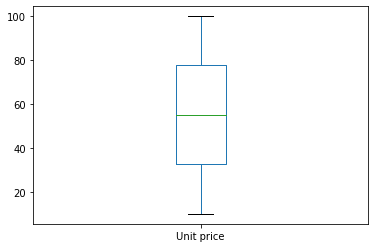

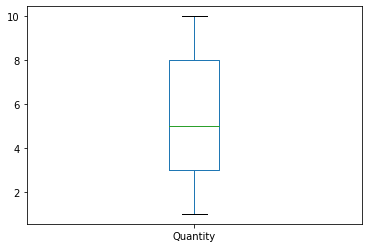

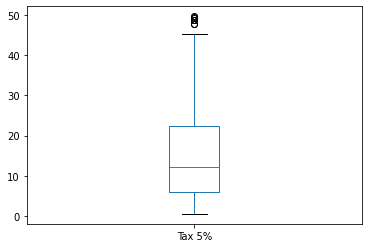

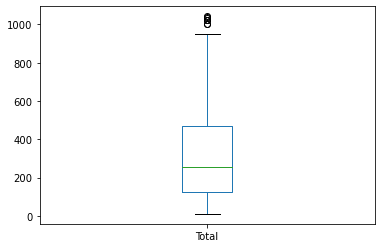

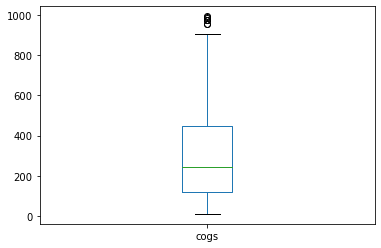

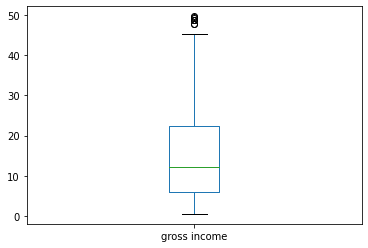

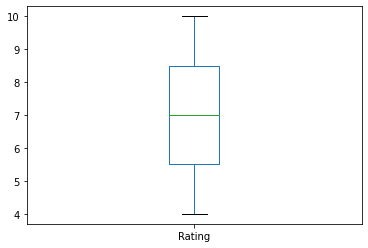

In [37]:
col_name= ["Unit price","Quantity","Tax 5%","Total","cogs","gross income","Rating"]

for i in col_name:
    super_df2[i].plot.box()
    plt.show()

### Winsorize

In [13]:
super_df3=super_df2.copy()

In [39]:
plt.figure(figsize=(20,30))

outliers_array=["Tax 5%","Total","cogs","gross income"]
for i in outliers_array:
    q25, q75 = np.percentile(super_df3[i], 25), np.percentile(super_df3[i], 75)
    iqr = q75 - q25
    cut_off=iqr*1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    super_df3=super_df3[(super_df3[i]>=lower)&(super_df3[i]<=upper)]

<Figure size 1440x2160 with 0 Axes>

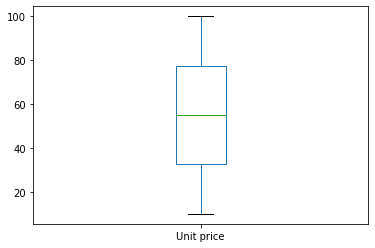

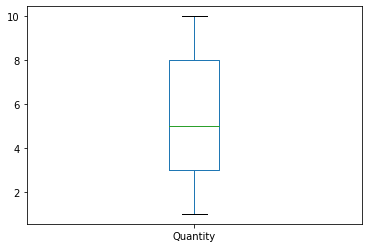

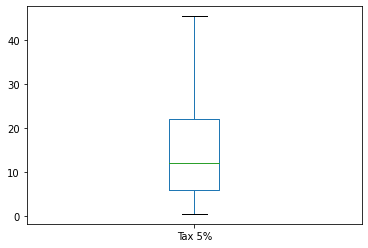

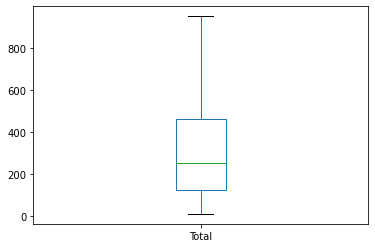

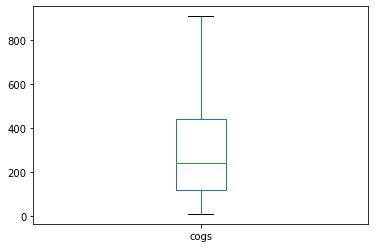

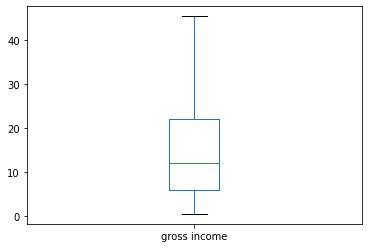

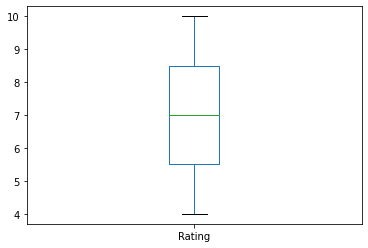

In [40]:
col_name_win= ["Unit price","Quantity","Tax 5%","Total","cogs","gross income","Rating"]

for i in col_name_win:
    super_df3[i].plot.box()
    plt.show()

***

*There is no outliers anymore*




## Numercal Variables

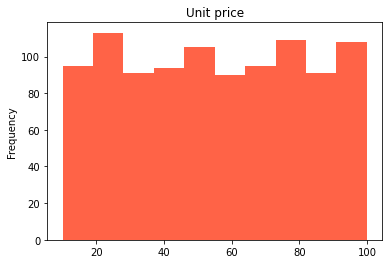

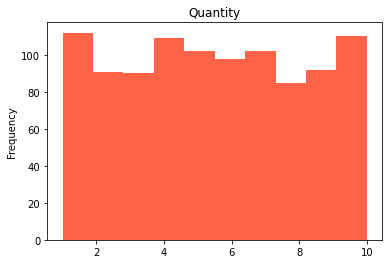

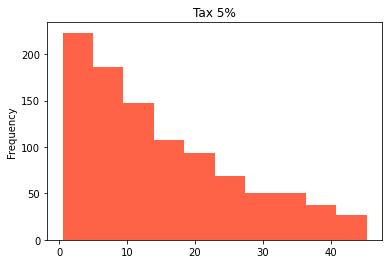

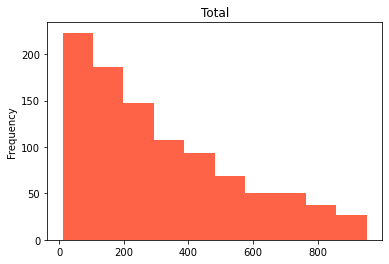

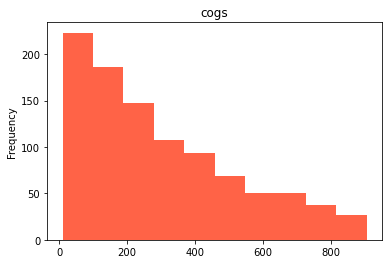

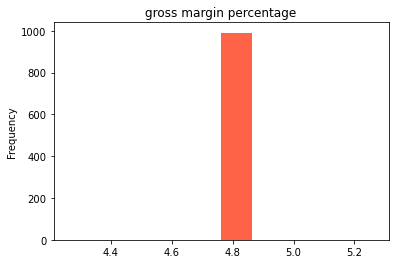

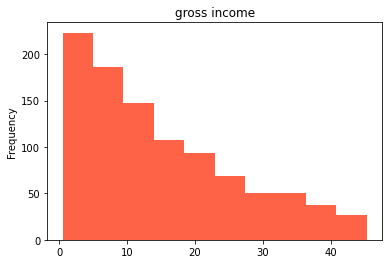

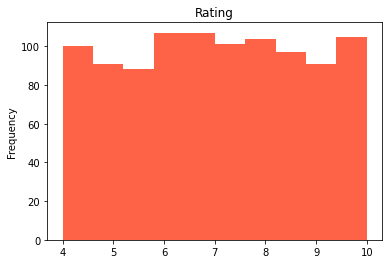

In [41]:
numeric_val=["Unit price","Quantity","Tax 5%","Total","cogs","gross margin percentage","gross income","Rating"]


    
for i in numeric_val:
    plt.title(i)
    super_df3[i].plot(kind="hist", color="#FF6347")
    plt.show()
  

## Explore Of Data

### 1. Branch-Gross Income

In [42]:
bg=super_df3[['Branch', 'gross income']].groupby(['Branch']).mean()
bg

gross income
Branch              
A          14.771889
B          15.029264
C          15.445346

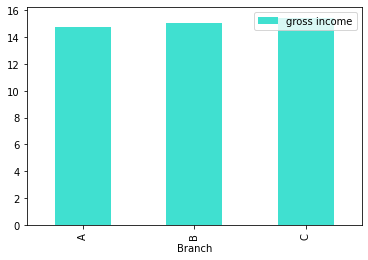

In [43]:
bg=super_df3[['Branch', 'gross income']].groupby(['Branch']).mean().plot(kind="bar", color="#40E0D0")


***

*Gross income: C > B > A*


***    

### 2. City-Gross Income

In [44]:
cg=super_df3[['City', 'gross income']].groupby(['City']).mean()
cg

gross income
City                   
Mandalay      15.029264
Naypyitaw     15.445346
Yangon        14.771889

<AxesSubplot:xlabel='City'>

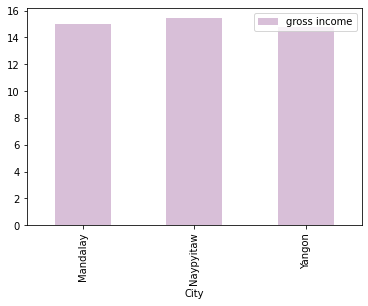

In [45]:
cg.plot(kind="bar", color="#D8BFD8")




*Gross income: Naypyitaw > Mandalay > Yangon*   




### 3. Customer Type - Gross Income

In [46]:
ctg=super_df3[['Customer type', 'gross income']].groupby(['Customer type']).mean()
ctg

gross income
Customer type              
Member            15.406926
Normal            14.742556

<AxesSubplot:xlabel='Customer type'>

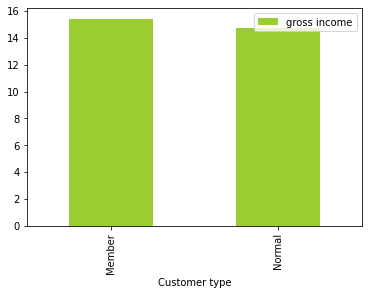

In [47]:
ctg.plot(kind="bar", color="#9ACD32")

***

*Gross Income: Member > Normal*


### 4. Gender - Gross Income

In [48]:
gg=super_df3[['Gender', 'gross income']].groupby(['Gender']).mean()
gg

gross income
Gender              
Female     15.559222
Male       14.594585

<AxesSubplot:xlabel='Gender'>

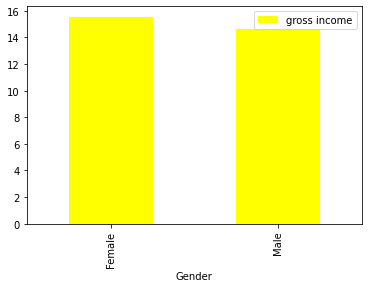

In [222]:
gg.plot(kind="bar", color="#FFFF00")




*Gross Income: Female > Male*



### 5. Product Line - Gross Income

In [50]:
pg=super_df3[['Product line', 'gross income']].groupby(['Product line']).mean()
pg

gross income
Product line                        
Electronic accessories     15.220597
Fashion accessories        13.932857
Food and beverages         15.169387
Health and beauty          15.411572
Home and lifestyle         15.198321
Sports and travel          15.619252

<AxesSubplot:xlabel='Product line'>

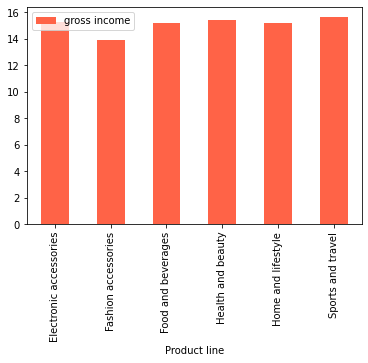

In [51]:
pg.plot(kind="bar", color="#FF6347")



*Gross Income: 1st: Sports and travel*
       

### 6. Branch - City - Gross Income

In [52]:
bcg=super_df3[['Branch', 'City','gross income']].groupby(['Branch','City']).mean()
bcg

gross income
Branch City                   
A      Yangon        14.771889
B      Mandalay      15.029264
C      Naypyitaw     15.445346

<AxesSubplot:xlabel='Branch,City'>

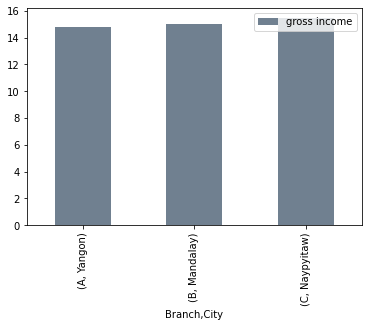

In [53]:
bcg.plot(kind="bar", color="#708090")

### 7. Product Line - Unit Price

In [54]:
pu=super_df3[['Product line', 'Unit price']].groupby(['Product line']).mean()
pu

Unit price
Product line                      
Electronic accessories   53.551588
Fashion accessories      56.444914
Food and beverages       55.763121
Health and beauty        54.854474
Home and lifestyle       54.249231
Sports and travel        56.760242

<AxesSubplot:xlabel='Product line'>

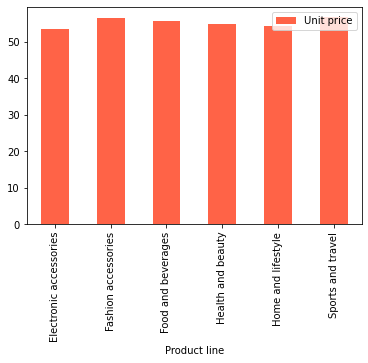

In [55]:
pu.plot(kind="bar", color="#FF6347")

### 8. Gender - Customer Type - Gross Income

In [56]:
gctg=super_df3[['Gender', 'Customer type','gross income']].groupby(['Gender','Customer type']).mean()
gctg

gross income
Gender Customer type              
Female Member            15.697514
       Normal            15.408677
Male   Member            15.094544
       Normal            14.125873

<AxesSubplot:xlabel='Gender,Customer type'>

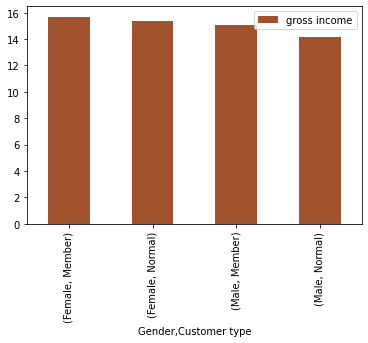

In [57]:
gctg.plot(kind="bar", color="#A0522D")

### 9. City - Customer Type  - Gross Income

In [58]:
cctg=super_df3[['City', 'Customer type','gross income']].groupby(['City','Customer type']).mean()
cctg

gross income
City      Customer type              
Mandalay  Member            15.499188
          Normal            14.559339
Naypyitaw Member            15.428419
          Normal            15.463359
Yangon    Member            15.294404
          Normal            14.264564

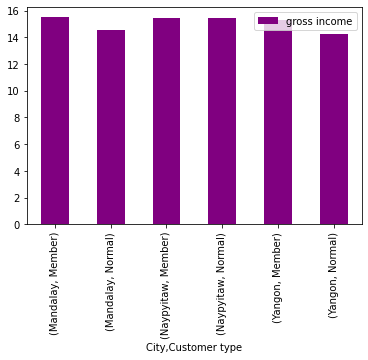

In [59]:
cctg=super_df3[['City', 'Customer type','gross income']].groupby(['City','Customer type']).mean().plot(kind="bar", color="#800080")

### 10. City - Gender - Product Line - Gross Income

In [60]:
cgplg=super_df3[['City', 'Gender','Product line','gross income']].groupby(['City','Gender','Product line']).mean()
cgplg

gross income
City      Gender Product line                        
Mandalay  Female Electronic accessories     13.888625
                 Fashion accessories        13.104606
                 Food and beverages         17.257793
                 Health and beauty          15.238925
                 Home and lifestyle         17.886325
                 Sports and travel          14.623517
          Male   Electronic accessories     15.670074
                 Fashion accessories        12.039121
                 Food and beverages         10.668690
                 Health and beauty          19.596409
                 Home and lifestyle         13.591893
                 Sports and travel          16.034797
Naypyitaw Female Electronic accessories     15.253768
                 Fashion accessories        13.645500
                 Food and beverages         18.824581
                 Health and beauty          13.345217
                 Home and lifestyle         14.938920
                 Sports and travel          17.422804
          Male   Electronic accessories     17.636259
                 Fashion accessories        15.937117
                 Food and beverages         13.785196
                 Health and beauty          16.698828
                 Home and lifestyle         10.648889
                 Sports and travel          13.438094
Yangon    Female Electronic accessories     16.949482
                 Fashion accessories        16.728268
                 Food and beverages         14.492261
                 Health and beauty          12.958952
                 Home and lifestyle         18.804781
                 Sports and travel          13.325414
          Male   Electronic accessories     12.426812
                 Fashion accessories        11.811682
                 Food and beverages         13.827671
                 Health and beauty          12.605962
                 Home and lifestyle         14.113106
                 Sports and travel          17.869083

<AxesSubplot:xlabel='City,Gender,Product line'>

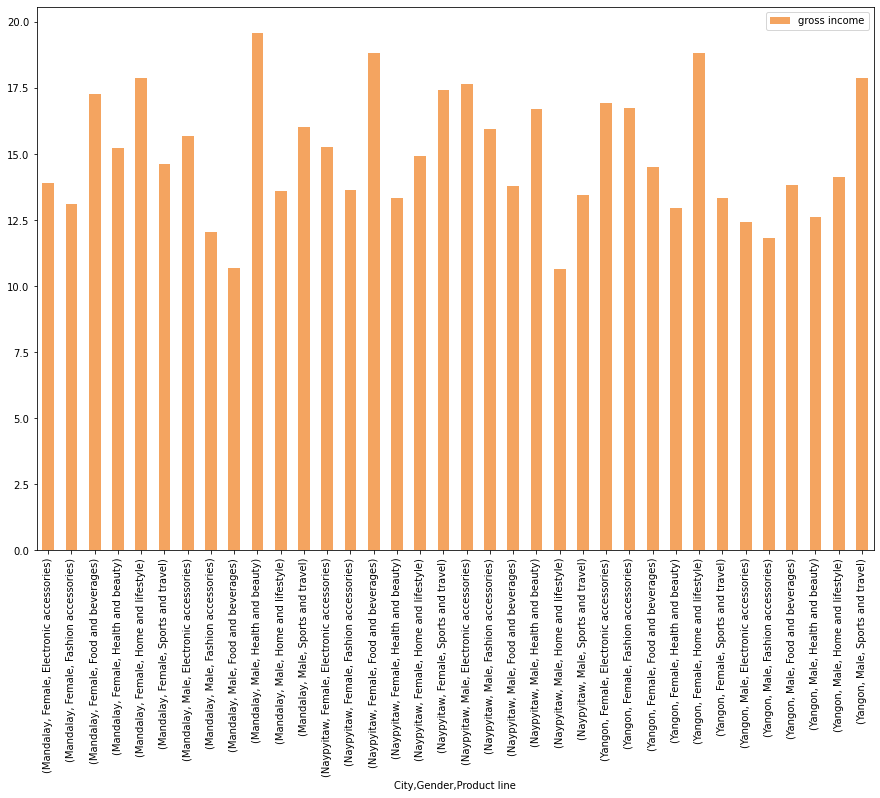

In [61]:
cgplg.plot(kind="bar", color="#F4A460", figsize=(15,10))

### 11. Max Profit - Product Line

In [62]:
pd.pivot_table(super_df3,columns=["City","Gender"],aggfunc="sum",values="gross income",index=["Product line"]).idxmax().unstack()

Gender                 Female               Male
City                                            
Mandalay   Food and beverages  Health and beauty
Naypyitaw  Food and beverages  Health and beauty
Yangon     Home and lifestyle  Sports and travel




*Max profit in product line based on city and gender*


### 12. Min Profit - Product Line

In [63]:
pd.pivot_table(super_df3,columns=["City","Gender"],aggfunc="sum",values="gross income",index=["Product line"]).idxmin().unstack()

Gender                Female                 Male
City                                             
Mandalay   Health and beauty   Food and beverages
Naypyitaw  Health and beauty   Home and lifestyle
Yangon     Health and beauty  Fashion accessories

***

*Max profit in product line based on city and gender*




### 13. Max Profit - Customer Type

In [64]:
pd.pivot_table(super_df3,columns=["City","Gender"],aggfunc="sum",values="gross income",index=["Customer type"]).idxmax().unstack()

Gender     Female    Male
City                     
Mandalay   Member  Member
Naypyitaw  Member  Normal
Yangon     Member  Member

***

*Max profit in customer type based on city and gender*





### 14. Min Profit - Customer Type

In [65]:
pd.pivot_table(super_df3,columns=["City","Gender"],aggfunc="sum",values="gross income",index=["Customer type"]).idxmin().unstack()

Gender     Female    Male
City                     
Mandalay   Normal  Normal
Naypyitaw  Normal  Member
Yangon     Normal  Normal

***


*Max profit in customer type based on city and gender*




### 15. Gross Income - Date

Text(0, 0.5, 'Gross Income')

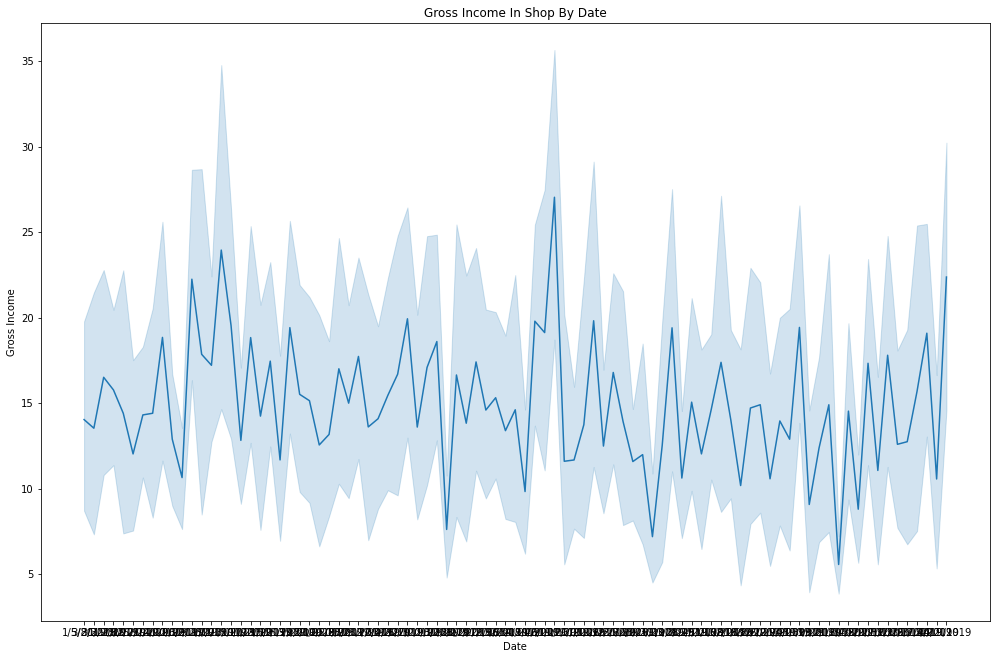

In [66]:
plt.figure(figsize=(17,11))
sns.lineplot(data=super_df3, x="Date", y="gross income")
plt.title("Gross Income In Shop By Date")
plt.xlabel("Date")
plt.ylabel("Gross Income")


### Which hour is the rush hour in the branchs?

In [16]:
super_df4=super_df3.copy()

In [17]:
super_df4['Hour'] = super_df4['Time'].apply(lambda x: x.split(':')[0].strip())
super_df4

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155   340.5255   
3         Health and beauty       58.22         8  23.2880   489.0480   
4         Sports and travel       86.31         7  30.2085   634.3785   
..                      ...         ...       ...      ...        ...   
995       Health and beauty       40.35         1   2.0175    42.3675   
996      Home and lifestyle       97.38        10  48.6900  1022.4900   
997      Food and beverages       31.84         1   1.5920    33.4320   
998      Home and lifestyle       65.82         1   3.2910    69.1110   
999     Fashion accessories       88.34         7  30.9190   649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
0     1/5/2019  13:08      Ewallet  522.83                 4.761905   
1     3/8/2019  10:29         Cash   76.40                 4.761905   
2     3/3/2019  13:23  Credit card  324.31                 4.761905   
3    1/27/2019  20:33      Ewallet  465.76                 4.761905   
4     2/8/2019  10:37      Ewallet  604.17                 4.761905   
..         ...    ...          ...     ...                      ...   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   
996   3/2/2019  17:16      Ewallet  973.80                 4.761905   
997   2/9/2019  13:22         Cash   31.84                 4.761905   
998  2/22/2019  15:33         Cash   65.82                 4.761905   
999  2/18/2019  13:28         Cash  618.38                 4.761905   

     gross income  Rating Hour  
0         26.1415     9.1   13  
1          3.8200     9.6   10  
2         16.2155     7.4   13  
3         23.2880     8.4   20  
4         30.2085     5.3   10  
..            ...     ...  ...  
995        2.0175     6.2   13  
996       48.6900     4.4   17  
997        1.5920     7.7   13  
998        3.2910     4.1   15  
999       30.9190     6.6   13  

[1000 rows x 18 columns]

In [18]:
rhb = go.Figure(go.Bar(x = super_df4.Hour.value_counts().index, y = super_df4.Hour.value_counts().values, marker = {'color' : '#A52A2A'}))
rhb.show()




*The rush hour is 19, the off-peak hour is 17*



In [70]:
pd.pivot_table(super_df4 , columns = 'Hour' , aggfunc='count' , values = 'Invoice ID')

Hour         10  11  12  13  14   15  16  17  18   19  20
Invoice ID  101  90  89  99  82  102  75  73  93  113  74



*113 people purchase at 19*




### Which product line that is sold the most?

In [71]:
plsm = pd.pivot_table(super_df4 , values = 'Invoice ID' ,index = 'Product line' , aggfunc='count')
plsm

Invoice ID
Product line                      
Electronic accessories         170
Fashion accessories            175
Food and beverages             173
Health and beauty              152
Home and lifestyle             156
Sports and travel              165

### Which product line that is sold the most for each branch?

In [72]:
pd.pivot_table(super_df4 , values = 'Invoice ID' , index = 'Branch' , columns = 'Product line' , aggfunc = 'count')

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Branch                                                                          
A                                 60                   50                  58   
B                                 55                   62                  50   
C                                 55                   63                  65   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Branch                                                                  
A                            47                  65                 59  
B                            53                  48                 62  
C                            52                  43                 44

In A : Home and lifestyle
 
In B: Fashion accessories and Sports and travel
    
In C: Food and beverages

### What is the distribution of gender among each branch?

In [73]:
pd.pivot_table(super_df4 , index = 'Gender' , values = 'Invoice ID' , columns = 'Branch' , aggfunc = 'count')

Branch    A    B    C
Gender               
Female  161  160  174
Male    178  170  148

For female is C branch


For male is A branch

### What is the distribution of customer type for each branch?

In [74]:
pd.pivot_table(super_df4 , index = 'Customer type' , values = 'Invoice ID' , columns = 'Branch' , aggfunc = 'count')

Branch           A    B    C
Customer type               
Member         167  165  166
Normal         172  165  156

### What is the prefered payment type of each branch?

In [75]:
pd.pivot_table(super_df4 ,index = 'Payment', values = 'Invoice ID'   , columns = 'Branch' , aggfunc = 'count')

Branch         A    B    C
Payment                   
Cash         110  110  122
Credit card  103  108   96
Ewallet      126  112  104

In A branch is prefered Ewallet

In B branch is prefered Ewallet

In C branch is prefered Cash

### What is the rating that each branch get?

In [76]:
rb= super_df4[['Branch' ,'Rating']].groupby(by = 'Branch').mean()
rb

Rating
Branch          
A       7.022124
B       6.831212
C       7.087267

### What is the relation between quantity and gender?

In [77]:
super_df4[['Quantity' , 'Gender']].groupby(by = 'Gender').mean()

Quantity
Gender          
Female  5.674747
Male    5.264113

### What the order of branches with regard of the profit - gross income?

In [78]:
super_df4[['Branch','gross margin percentage']].groupby(by = 'Branch').sum()

gross margin percentage
Branch                         
A                   1614.285714
B                   1571.428571
C                   1533.333333

### Correlation Matrix

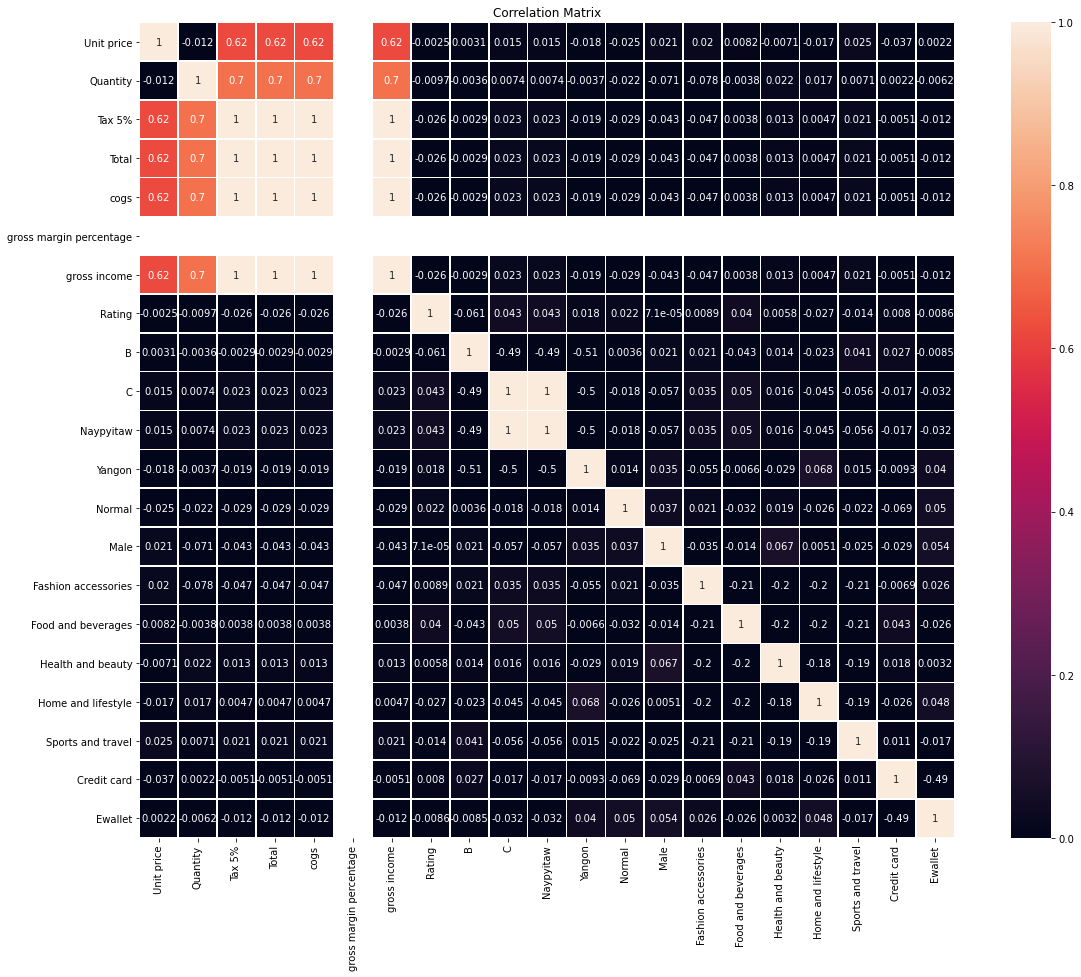

In [79]:
correlation_matrix= super_df4.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, square=True, annot=True, vmin=0, vmax=1, linewidth=0.5)
plt.title("Correlation Matrix")
plt.show()

## Regression

### Train and Test Dataset

In [80]:
X= super_df4[["Unit price","Quantity", "cogs", "Total", "Rating"]]
y = super_df4["gross income"]

In [81]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=1111)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(792, 5)
(199, 5)
(792,)
(199,)


### Linear Regression

**General Model**

In [82]:
model= linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [83]:
print('Variables: \n', model.coef_)
print('Fixed Value (bias): \n', model.intercept_)

Variables: 
 [2.60415408e-16 5.12080030e-16 2.37812128e-02 2.49702735e-02
 5.67975968e-17]
Fixed Value (bias): 
 -1.0658141036401503e-14


In [84]:
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gross income   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.640e+31
Date:                Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:26:42   Log-Likelihood:                 29687.
No. Observations:                 991   AIC:                        -5.936e+04
Df Residuals:                     986   BIC:                        -5.934e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.318e-15   4.75e-15     -0.277      0.782   -1.06e-14    8.01e-15
Unit price  5.339e-16   6.12e-17      8.729      0.000    4.14e-16    6.54e-16
Quantity   -4.996e-16   6.06e-16     -0.824      0.410   -1.69e-15     6.9e-16
cogs           0.0238   4.73e-18   5.03e+15      0.000       0.024       0.024
Total          0.0250   4.97e-18   5.03e+15      0.000       0.025       0.025
Rating      1.372e-15    4.4e-16      3.122      0.002     5.1e-16    2.23e-15
==============================================================================
Omnibus:                       17.480   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.204
Skew:                           0.293   Prob(JB):                     0.000184
Kurtosis:                       2.731   Cond. No.                     9.39e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.39e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

This model is perfect.

**Train Model (OLS)**

In [85]:
model2= linear_model.LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [86]:
print('Variables: \n', model2.coef_)
print('Fixed Value (bias): \n', model2.intercept_)

Variables: 
 [-9.36788951e-17  4.40851063e-16  2.37812128e-02  2.49702735e-02
 -4.24196787e-17]
Fixed Value (bias): 
 -1.7763568394002505e-15


**Prediction**

In [87]:
y_preds_train = model2.predict(X_train)
y_preds_test = model2.predict(X_test) 

In [88]:
print("R-squared of the model in training set is: {}".format(model2.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(model2.score(X_test, y_test)))
print("Mean absolute error (MAE) of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error (MSE) of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error (RMSE) of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error (MAPE) of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 1.0
Mean absolute error (MAE) of the prediction is: 5.124320844815107e-15
Mean squared error (MSE) of the prediction is: 4.757724425430981e-29
Root mean squared error (RMSE) of the prediction is: 6.897625986838501e-15
Mean absolute percentage error (MAPE) of the prediction is: 4.9499652675899536e-14


### Adding Variable

**1. Male-Normal**

In [89]:
super_df4['Male_Normal'] = super_df4["Male"]* super_df4["Normal"]

In [90]:
X2= super_df4[["Unit price","Quantity", "Rating",'Male_Normal']]
y2 = super_df4["gross income"]

In [91]:
X2_train, X2_test, y2_train, y2_test =  train_test_split(X2, y2, test_size=0.20, random_state=1111)


print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(792, 4)
(199, 4)
(792,)
(199,)


**Train Model**

In [92]:
model3= linear_model.LinearRegression()
model3.fit(X2_train, y2_train)

LinearRegression()

In [93]:
print('Variables: \n', model3.coef_)
print('Fixed Value (bias): \n', model3.intercept_)

Variables: 
 [ 0.27237631  2.6967335  -0.09411675  0.03249437]
Fixed Value (bias): 
 -14.002460888634062


**Prediction**

In [94]:
y2_preds_train = model3.predict(X2_train)
y2_preds_test = model3.predict(X2_test) 

In [95]:
print("R-squared of the model in training set is: {}".format(model3.score(X2_train, y2_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(model3.score(X2_test, y2_test)))
print("Mean absolute error (MAE) of the prediction is: {}".format(mean_absolute_error(y2_test, y2_preds_test)))
print("Mean squared error (MSE) of the prediction is: {}".format(mse(y2_test, y2_preds_test)))
print("Root mean squared error (RMSE) of the prediction is: {}".format(rmse(y2_test, y2_preds_test)))
print("Mean absolute percentage error (MAPE) of the prediction is: {}".format(np.mean(np.abs((y2_test - y2_preds_test) / y2_test)) * 100))

R-squared of the model in training set is: 0.8872907100718105
-----Test set statistics-----
R-squared of the model in test set is: 0.8886959750504059
Mean absolute error (MAE) of the prediction is: 2.756030197513598
Mean squared error (MSE) of the prediction is: 13.723996943718548
Root mean squared error (RMSE) of the prediction is: 3.704591332889304
Mean absolute percentage error (MAPE) of the prediction is: 49.675752648922916


R^2 and adj. R^2 are bigger than 70%. This model is good.

**2. Male - Credit Card**

In [96]:
super_df4['Male_CreditCard'] = super_df4["Male"]* super_df4["Credit card"]

In [97]:
X3= super_df4[["Unit price","Quantity", "Rating",'Male_Normal','Male_CreditCard' ]]
y3 = super_df4["gross income"]

In [98]:
X3_train, X3_test, y3_train, y3_test =  train_test_split(X3, y3, test_size=0.20, random_state=1111)


print(X3_train.shape)
print(X3_test.shape)
print(y3_train.shape)
print(y3_test.shape)

(792, 5)
(199, 5)
(792,)
(199,)


**Train Model**

In [99]:
model4= linear_model.LinearRegression()
model4.fit(X3_train, y3_train)

LinearRegression()

In [100]:
print('Variables: \n', model4.coef_)
print('Fixed Value (bias): \n', model4.intercept_)

Variables: 
 [ 2.72250393e-01  2.69670869e+00 -9.59046056e-02 -2.53263881e-03
  2.34848777e-01]
Fixed Value (bias): 
 -14.008652662305732


**Prediction**

In [101]:
y3_preds_train = model4.predict(X3_train)
y3_preds_test = model4.predict(X3_test) 

In [102]:
print("R-squared of the model in training set is: {}".format(model4.score(X3_train, y3_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(model4.score(X3_test, y3_test)))
print("Mean absolute error (MAE) of the prediction is: {}".format(mean_absolute_error(y3_test, y3_preds_test)))
print("Mean squared error (MSE) of the prediction is: {}".format(mse(y3_test, y3_preds_test)))
print("Root mean squared error (RMSE) of the prediction is: {}".format(rmse(y3_test, y3_preds_test)))
print("Mean absolute percentage error (MAPE) of the prediction is: {}".format(np.mean(np.abs((y3_test - y3_preds_test) / y3_test)) * 100))

R-squared of the model in training set is: 0.8873422516426608
-----Test set statistics-----
R-squared of the model in test set is: 0.8883035620768418
Mean absolute error (MAE) of the prediction is: 2.7616639931501945
Mean squared error (MSE) of the prediction is: 13.772382206087164
Root mean squared error (RMSE) of the prediction is: 3.7111160324203234
Mean absolute percentage error (MAPE) of the prediction is: 49.75961215638016


Resuls are nearly same Male-Normal model' results

## Light GBM

In [184]:
X_sc= super_df4[["Unit price","Quantity", "Rating",'Male_Normal']]
y_sc = super_df4["gross income"]

**Standard Scaler**

In [185]:
#Scaling using the Standard Scaler
sc=StandardScaler()
sc.fit(X_sc)
X_sc2=pd.DataFrame(sc.fit_transform(X_sc))

**Train - Test Split**

In [186]:
X_sc_train, X_sc_test, y_sc_train, y_sc_test=train_test_split(X_sc, y_sc,test_size=0.3,random_state=11)

**Dataset Format**

In [187]:
#Converting the data into proper LGB Dataset Format
d_train=lgb.Dataset(X_sc_train, label=y_sc_train)

**Parameters**

In [188]:
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='regression'#regression task
params['n_estimators']=100
params['max_depth']=10

**Model**

In [189]:
#model creation and training
clf=lgb.train(params,d_train,100)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 307
[LightGBM] [Info] Number of data points in the train set: 693, number of used features: 4
[LightGBM] [Info] Start training from score 15.068433
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

C:\Users\Lenovo\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning:

Found `n_estimators` in params. Will use it instead of argument



**Prediction**

In [190]:
#model prediction on X_test
y_sc_pred=clf.predict(X_sc_test)

**RMSE**

In [191]:
#using RMSE error metric
print("Root mean squared error (RMSE) of the prediction is: {}".format(rmse(y_sc_test, y_sc_pred)))

Root mean squared error (RMSE) of the prediction is: 0.8133838359571479


## RNN

In [111]:
super_df4.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  ...  \
0       Health and beauty       74.69         7  26.1415  548.9715  ...   
1  Electronic accessories       15.28         5   3.8200   80.2200  ...   
2      Home and lifestyle       46.33         7  16.2155  340.5255  ...   
3       Health and beauty       58.22         8  23.2880  489.0480  ...   
4       Sports and travel       86.31         7  30.2085  634.3785  ...   

  Fashion accessories Food and beverages Health and beauty  \
0                   0                  0                 1   
1                   0                  0                 0   
2                   0                  0                 0   
3                   0                  0                 1   
4                   0                  0                 0   

   Home and lifestyle  Sports and travel  Credit card  Ewallet  Hour  \
0                   0                  0            0        1    13   
1                   0                  0            0        0    10   
2                   1                  0            1        0    13   
3                   0                  0            0        1    20   
4                   0                  1            0        1    10   

   Male_Normal  Male_CreditCard  
0            0                0  
1            0                0  
2            1                1  
3            0                0  
4            1                0  

[5 rows x 33 columns]

**Preparing The Data**

In [112]:
X_rnn= super_df4[["Unit price","Quantity", "Rating",'Male_Normal']]
y_rnn = super_df4["gross income"]

In [113]:
X_rnn_train, X_rnn_test, y_rnn_train, y_rnn_test= train_test_split(X_rnn,y_rnn, test_size=0.3, random_state=123)

print("Train set shape (X) {}".format(X_rnn_train.shape))
print("Train set shape (y) {}".format(y_rnn_train.shape))
print("Test set shape (X) {}".format(X_rnn_test.shape))
print("Test set shape (y) {}".format(y_rnn_test.shape))

Train set shape (X) (693, 4)
Train set shape (y) (693,)
Test set shape (X) (298, 4)
Test set shape (y) (298,)


**Sequential Model - Dense Layer**

In [114]:
input_shape= X_rnn_train.shape[1]

model= Sequential()
model.add(Dense(100, activation="relu", input_shape=(input_shape,), name="first_layer"))
model.add(Dense(64, activation="relu", name="layer_2"))
model.add(Dense(16, activation="relu", name="layer_3"))
model.add(Dense(8, activation="relu", name="layer_4"))
model.add(Dense(1, name="output"))

**Compile**

In [115]:
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_layer (Dense)          (None, 100)               500       
_________________________________________________________________
layer_2 (Dense)              (None, 64)                6464      
_________________________________________________________________
layer_3 (Dense)              (None, 16)                1040      
_________________________________________________________________
layer_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
output (Dense)               (None, 1)                 9         
Total params: 8,149
Trainable params: 8,149
Non-trainable params: 0
_________________________________________________________________


**Fitting**

In [116]:
callback= keras.callbacks.EarlyStopping(monitor="loss", patience=3)
model.fit(X_rnn_train, y_rnn_train, epochs=30, batch_size=100000, verbose=2, validation_split=0.2, callbacks=[callback])

Epoch 1/30
1/1 - 22s - loss: 272.8159 - mae: 12.7841 - val_loss: 266.2958 - val_mae: 12.2810
Epoch 2/30
1/1 - 0s - loss: 238.6070 - mae: 11.6648 - val_loss: 235.7856 - val_mae: 11.4778
Epoch 3/30
1/1 - 0s - loss: 209.3985 - mae: 10.7975 - val_loss: 206.6822 - val_mae: 10.6483
Epoch 4/30
1/1 - 0s - loss: 181.8321 - mae: 9.9043 - val_loss: 177.3461 - val_mae: 9.8256
Epoch 5/30
1/1 - 0s - loss: 154.0558 - mae: 9.0283 - val_loss: 150.2436 - val_mae: 9.0249
Epoch 6/30
1/1 - 0s - loss: 128.2075 - mae: 8.1791 - val_loss: 127.4352 - val_mae: 8.4052
Epoch 7/30
1/1 - 0s - loss: 106.2690 - mae: 7.4663 - val_loss: 110.6613 - val_mae: 7.9567
Epoch 8/30
1/1 - 0s - loss: 90.5289 - mae: 6.9328 - val_loss: 98.4054 - val_mae: 7.6004
Epoch 9/30
1/1 - 0s - loss: 78.7749 - mae: 6.5600 - val_loss: 89.7614 - val_mae: 7.3004
Epoch 10/30
1/1 - 0s - loss: 70.2742 - mae: 6.3501 - val_loss: 85.0172 - val_mae: 7.0668
Epoch 11/30
1/1 - 0s - loss: 65.4301 - mae: 6.2277 - val_loss: 84.0711 - val_mae: 6.9993
Epoch 12/

**Model Errors**

In [117]:
 
mae_rnn_train= model.evaluate(X_rnn_train, y_rnn_train)[1]
mae_rnn_test= model.evaluate(X_rnn_test, y_rnn_test)[1]

print("Mean Squared Error Of Train Set: {}".format(mae_rnn_train))
print("Mean Squared Error Of Test Set: {}".format(mae_rnn_test))

10/10 [==============================] - 0s 2ms/step - loss: 82.3827 - mae: 6.9679
Mean Squared Error Of Train Set: 6.9051713943481445
Mean Squared Error Of Test Set: 6.967868328094482


**Prediction**

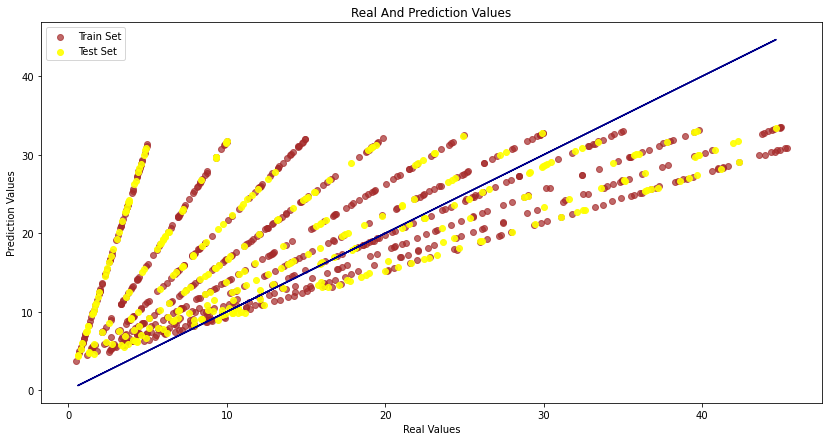

In [118]:
train_rnn_pred= model.predict(X_rnn_train)
test_rnn_pred= model.predict(X_rnn_test)

plt.figure(figsize=(14,7))
ax1= plt.scatter(y_rnn_train, train_rnn_pred, alpha=0.7, color="Brown")
ax2= plt.scatter(y_rnn_test, test_rnn_pred, alpha=0.9, color="Yellow")
ax3= plt.plot(y_rnn_test, y_rnn_test, color="darkblue")
plt.title("Real And Prediction Values")
plt.xlabel("Real Values")
plt.ylabel("Prediction Values",)
plt.legend([ax1,ax2], ["Train Set", "Test Set"])
plt.show()

## LSTM

In [19]:
super_df5=super_df4.copy()

In [20]:
super_df5['Months'] = super_df4['Date'].apply(lambda x: x.split('/')[0].strip())

super_df5['Year'] = super_df4['Date'].apply(lambda x: x.split('/')[2].strip())
super_df5

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155   340.5255   
3         Health and beauty       58.22         8  23.2880   489.0480   
4         Sports and travel       86.31         7  30.2085   634.3785   
..                      ...         ...       ...      ...        ...   
995       Health and beauty       40.35         1   2.0175    42.3675   
996      Home and lifestyle       97.38        10  48.6900  1022.4900   
997      Food and beverages       31.84         1   1.5920    33.4320   
998      Home and lifestyle       65.82         1   3.2910    69.1110   
999     Fashion accessories       88.34         7  30.9190   649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
0     1/5/2019  13:08      Ewallet  522.83                 4.761905   
1     3/8/2019  10:29         Cash   76.40                 4.761905   
2     3/3/2019  13:23  Credit card  324.31                 4.761905   
3    1/27/2019  20:33      Ewallet  465.76                 4.761905   
4     2/8/2019  10:37      Ewallet  604.17                 4.761905   
..         ...    ...          ...     ...                      ...   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   
996   3/2/2019  17:16      Ewallet  973.80                 4.761905   
997   2/9/2019  13:22         Cash   31.84                 4.761905   
998  2/22/2019  15:33         Cash   65.82                 4.761905   
999  2/18/2019  13:28         Cash  618.38                 4.761905   

     gross income  Rating Hour Months  Year  
0         26.1415     9.1   13      1  2019  
1          3.8200     9.6   10      3  2019  
2         16.2155     7.4   13      3  2019  
3         23.2880     8.4   20      1  2019  
4         30.2085     5.3   10      2  2019  
..            ...     ...  ...    ...   ...  
995        2.0175     6.2   13      1  2019  
996       48.6900     4.4   17      3  2019  
997        1.5920     7.7   13      2  2019  
998        3.2910     4.1   15      2  2019  
999       30.9190     6.6   13      2  2019  

[1000 rows x 20 columns]

In [21]:
super_df5["Year"].value_counts()

2019    1000
Name: Year, dtype: int64

Dataset have only 2019 year

In [22]:
rhbm = go.Figure(go.Bar(x = super_df5.Months.value_counts().index, y = super_df5.Months.value_counts().values, marker = {'color' : '#DEB887'}))
rhbm.show()

Amount of sales in months : 1 (347) > 3 (344) > 2 (300)

In [207]:
df1=super_df["Date"]
df2=super_df["gross income"]

new_df =pd.concat([df1, df2], axis=1, join='inner')
new_df

Date  gross income
0     1/5/2019       26.1415
1     3/8/2019        3.8200
2     3/3/2019       16.2155
3    1/27/2019       23.2880
4     2/8/2019       30.2085
..         ...           ...
995  1/29/2019        2.0175
996   3/2/2019       48.6900
997   2/9/2019        1.5920
998  2/22/2019        3.2910
999  2/18/2019       30.9190

[1000 rows x 2 columns]

In [208]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1000 non-null   object 
 1   gross income  1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [209]:
dataset = new_df.loc[:,["gross income"]].values

**Normalize the Dataset**

In [210]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


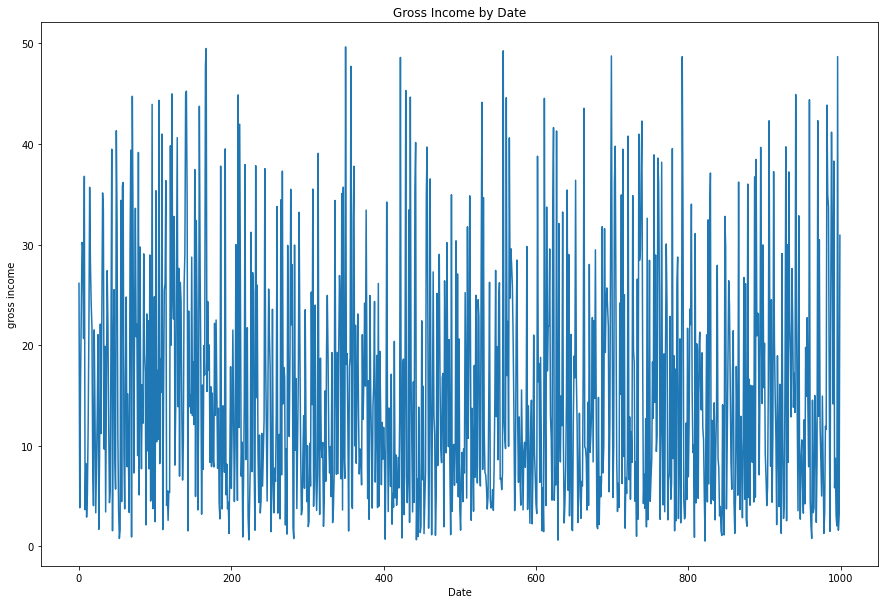

In [211]:
plt.figure(figsize=(15, 10))
dataset = new_df.iloc[:,1].values #Converting to Numpy
plt.plot(dataset)
plt.xlabel("Date")
plt.ylabel("gross income")
plt.title("Gross Income by Date")
plt.show()

**Reshaping**

In [212]:
dataset = dataset.reshape(-1,1) 
dataset = dataset.astype("float32") # Converting from integer to float
dataset.shape

(1000, 1)

**Scaling**

In [213]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset) 

We normalized our data between 0 and 1. Must be done on all Neural Networks. - Speed increases, - Result improves

**Train - Test Split**

In [214]:
train_size = int(len(dataset)*0.8) 
test_size = len(dataset)- train_size 
train = dataset[0:train_size,:] 
test = dataset[train_size:len(dataset),:] 
print("Train Size : {}, Test Size: {}".format(len(train),len(test)))

Train Size : 800, Test Size: 200


In [215]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY) 

In [216]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY)

In [217]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

**Model**

In [218]:
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
789/789 [==============================] - 5s 3ms/step - loss: 0.0671
Epoch 2/50
789/789 [==============================] - 2s 3ms/step - loss: 0.0597
Epoch 3/50
789/789 [==============================] - 2s 3ms/step - loss: 0.0570
Epoch 4/50
789/789 [==============================] - 2s 3ms/step - loss: 0.0557
Epoch 5/50
789/789 [==============================] - 2s 3ms/step - loss: 0.0588
Epoch 6/50
789/789 [==============================] - 2s 3ms/step - loss: 0.0610
Epoch 7/50
789/789 [==============================] - 2s 3ms/step - loss: 0.0567
Epoch 8/50
789/789 [==============================] - 2s 3ms/step - loss: 0.0549
Epoch 9/50
789/789 [==============================] - 2s 3ms/step - loss: 0.0584
Epoch 10/50
789/789 [==============================] - 2s 3ms/step - loss: 0.0600
Epoch 11/50
789/789 [==============================] - 2s 3ms/step - loss: 0.0539
Epoch 12/50
789/789 [==============================] - 2s 3ms/step - loss: 0.0559
Epoch 13/50
789/789 [====

**Prediction**

In [219]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

**Invert Predictions**

In [220]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

**Root Mean Squared Error**

In [194]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 11.50 RMSE
Test Score: 18.49 RMSE


**Shifting Train**

In [181]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict

**Shifting Test Predictions for Plotting**

In [182]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict

**Plot Baseline and Predictions**

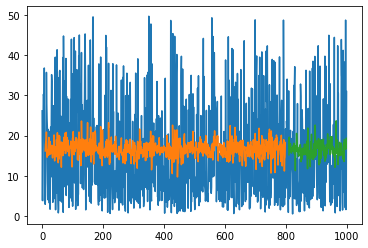

In [183]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

*Orange line is train dataset and green line is test dataset.*